## Contextualização 

* No setor da indústria manufatureira de objetos cerâmicos os principais problemas enfrentados são identificação rápida e eficiente de pequenas deformações/fissuras. 

* Tipos de fissura podem acontecer na estrutura interna das peças e que não são facilmente identificadas através de uma inspeção visual.

* Hoje na indústria cerâmica o processo de controle de qualidade para defeitos não-visuais é tradicionalmente realizado de forma manual.


## Importe as bibliotecas para realização do projeto 

  Bibliotecas necessárias: 
	 

*   numpy (https://numpy.org/doc/stable/)
*   pandas (https://pandas.pydata.org/docs/)
*   matplotlib (https://matplotlib.org/contents.html)
*   seaborn (https://seaborn.pydata.org/)
*   Plotly (https://plotly.com/)
*   modelos (scikitlearn: https://scikit-learn.org/stable/supervised_learning.html)
*   métricas  (scikitlearn: https://scikit-learn.org/stable/modules/model_evaluation.html)
*   cross validation (scikitlearn : https://scikit-learn.org/stable/modules/cross_validation.html)
*   SearchGrid (scikitlearn : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   Pipeline(scikitlearn: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
*   Discrete Fourier Transform  (https://numpy.org/doc/stable/reference/routines.fft.html)
*   WavFile (https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html)
*  Outras: qualquer lib que vocês quiserem usar como suporte para o desenvolvimento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import soundfile as sf
import os
import audioop
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
from sklearn import preprocessing
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leitura da base de dados (wav) e Pré-processamento 

https://alunosatcedu-my.sharepoint.com/:f:/g/personal/yuri_crotti_satc_edu_br/EqmLFeEuV-5Fks6OKqncfigBKPLtbOZGgkuBjy35WPvwFA?e=nRtTdC


In [ ]:
path1 = '/content/drive/MyDrive/Dataset/bad'
dirs = os.listdir( path1 )


In [ ]:
for file1 in dirs:
   print(file1)

124.wav
123.wav
126.wav
101.wav
105.wav
116.wav
107.wav
12.wav
115.wav
111.wav
125.wav
103.wav
121.wav
1.wav
117.wav
109.wav
10.wav
119.wav
104.wav
120.wav
106.wav
112.wav
108.wav
100.wav
118.wav
110.wav
114.wav
11.wav
102.wav
122.wav
113.wav
89.wav
71.wav
25.wav
131.wav
129.wav
137.wav
61.wav
54.wav
75.wav
90.wav
44.wav
59.wav
13.wav
43.wav
41.wav
74.wav
40.wav
91.wav
48.wav
7.wav
73.wav
94.wav
76.wav
37.wav
99.wav
39.wav
68.wav
14.wav
80.wav
32.wav
67.wav
83.wav
64.wav
21.wav
36.wav
56.wav
95.wav
66.wav
138.wav
35.wav
27.wav
20.wav
53.wav
24.wav
98.wav
140.wav
133.wav
128.wav
63.wav
60.wav
5.wav
9.wav
136.wav
38.wav
70.wav
4.wav
42.wav
79.wav
85.wav
96.wav
28.wav
65.wav
84.wav
81.wav
46.wav
130.wav
3.wav
49.wav
97.wav
19.wav
57.wav
26.wav
51.wav
62.wav
33.wav
6.wav
22.wav
78.wav
18.wav
17.wav
50.wav
16.wav
8.wav
31.wav
134.wav
132.wav
29.wav
77.wav
52.wav
2.wav
34.wav
93.wav
92.wav
30.wav
86.wav
55.wav
23.wav
87.wav
82.wav
45.wav
58.wav
135.wav
69.wav
15.wav
88.wav
72.wav
139.wav
47.

In [ ]:
path2 = '/content/drive/MyDrive/Dataset/good'
dirs = os.listdir( path2 )


In [ ]:
for file2 in dirs:
   print(file2)

89.wav
8.wav
72.wav
48.wav
44.wav
92.wav
137.wav
56.wav
93.wav
7.wav
68.wav
16.wav
37.wav
10.wav
30.wav
79.wav
103.wav
82.wav
6.wav
35.wav
95.wav
41.wav
108.wav
124.wav
36.wav
17.wav
63.wav
130.wav
78.wav
46.wav
29.wav
70.wav
12.wav
113.wav
86.wav
67.wav
27.wav
115.wav
83.wav
19.wav
50.wav
20.wav
4.wav
81.wav
110.wav
32.wav
43.wav
88.wav
138.wav
136.wav
14.wav
24.wav
134.wav
139.wav
87.wav
23.wav
28.wav
107.wav
75.wav
114.wav
140.wav
121.wav
65.wav
57.wav
33.wav
131.wav
98.wav
73.wav
116.wav
38.wav
64.wav
40.wav
54.wav
15.wav
77.wav
80.wav
11.wav
128.wav
22.wav
101.wav
99.wav
123.wav
119.wav
129.wav
62.wav
53.wav
96.wav
84.wav
127.wav
97.wav
104.wav
3.wav
111.wav
39.wav
2.wav
85.wav
34.wav
106.wav
74.wav
66.wav
58.wav
132.wav
52.wav
94.wav
51.wav
59.wav
71.wav
55.wav
125.wav
91.wav
135.wav
133.wav
69.wav
1.wav
61.wav
13.wav
21.wav
49.wav
18.wav
102.wav
112.wav
25.wav
126.wav
122.wav
45.wav
47.wav
90.wav
60.wav
31.wav
42.wav
9.wav
76.wav
105.wav
117.wav
118.wav
100.wav
120.wav
26.wav
5.

### Crie DataFrame com os dados com seus respectivos rótulos 

Percorrer as pastas com áudios de telhas boas e ruins, criar um dataset com a extração de das características.

### Extração de características dos áudios 
*   Valor Mínimo do sinal 
*   Valor Máximo do sinal 
*   Valor médio 
*   Força 
*   Valor RMS
*   Variância 
*   Fator de Forma 
*   Fator de crista 
*   Energia 

In [ ]:
colunas = ['qualidade', 'data', 'rate', 'valorMinimo', 'valorMaximo',  'valorMedio',  'forca', 'valorRMS', 
           'variancia', 'fatorForma', 'fatorCrista', 'energia']

In [ ]:
def extrair(df, dataset, rate, qualidade):
  df = df.append({'qualidade': qualidade, 'data': data, 'rate': rate, 'valorMinimo': np.min(dataset), 'valorMaximo': np.max(dataset),
       'valorMedio': np.mean(dataset), 'forca': np.sum(dataset), 'valorRMS': audioop.rms(dataset, 2), 'variancia': np.var(dataset),
       'fatorForma': np.max(dataset) / audioop.rms(dataset, 2), 'fatorCrista': np.max(dataset) / np.mean(dataset),
       'energia': np.sum(dataset**2)}, ignore_index=True
  )
  return df

In [ ]:
dataframe = pd.DataFrame(data = [], columns = colunas)

In [ ]:
for classe in ['bad', 'good']:
  for i in range(1, 141):
    data_dir = pjoin(dirname(scipy.io.__file__), '/content/drive/MyDrive/Dataset/'+str(classe)+'/')
    wav_fname = pjoin(data_dir, str(i)+'.wav')
    rate, data = wavfile.read(wav_fname)
    dataframe = extrair(dataframe, data, rate, 0 if classe == 'bad' else 1)

In [ ]:
dataframe.to_csv('dataset.csv', index=False)

### Análise e pré-processamento numérica dos dados 

Realize uma análise nos dados com as ferramentas com as funções  head(), describe(), info(). Caso seja necessário aplique técnicas para tratar dados nulos, dados categóricos e outliers.   

In [ ]:
dataframe.head()

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.657955,-29180,3973,1.579228e+07,8.182985,-19609.102125,5427976
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,31231,1.311364,23080,3789,1.436082e+07,8.242544,23815.667244,4719834
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,0.523977,9222,3823,1.461783e+07,8.504054,62046.584255,5181162
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.246591,-4340,3640,1.325203e+07,8.931593,-131841.843318,4121264
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,27135,-1.147614,-20198,3522,1.240638e+07,7.704429,-23644.717299,3403924


In [ ]:
dataframe.isnull().sum()

qualidade      0
data           0
rate           0
valorMinimo    0
valorMaximo    0
valorMedio     0
forca          0
valorRMS       0
variancia      0
fatorForma     0
fatorCrista    0
energia        0
dtype: int64

In [ ]:
dataframe.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qualidade    280 non-null    object 
 1   data         280 non-null    object 
 2   rate         280 non-null    object 
 3   valorMinimo  280 non-null    object 
 4   valorMaximo  280 non-null    object 
 5   valorMedio   280 non-null    float64
 6   forca        280 non-null    object 
 7   valorRMS     280 non-null    object 
 8   variancia    280 non-null    float64
 9   fatorForma   280 non-null    float64
 10  fatorCrista  280 non-null    float64
 11  energia      280 non-null    object 
dtypes: float64(4), object(8)
memory usage: 26.4+ KB


In [ ]:
dataframe[['rate', 'valorMinimo', 'valorMaximo', 'forca']] = dataframe[['rate', 'valorMinimo', 'valorMaximo', 'forca']].apply(pd.to_numeric)

In [ ]:
dataframe.describe()

,rate,valorMinimo,valorMaximo,valorMedio,forca,variancia,fatorForma,fatorCrista
count,280.0,280.000000,280.000000,280.000000,280.000000,2.800000e+02,280.000000,2.800000e+02
mean,44000.0,-32753.285714,32442.428571,0.043940,773.335714,3.337947e+07,5.889272,1.547547e+05
std,0.0,126.566473,449.693821,3.541518,62330.717019,1.122097e+07,1.087826,2.455717e+06
min,44000.0,-32767.000000,27135.000000,-15.649545,-275432.000000,1.240638e+07,4.313520,-2.151104e+06
25%,44000.0,-32767.000000,32511.000000,-2.009901,-35374.250000,2.407030e+07,4.941641,-1.611614e+04
50%,44000.0,-32767.000000,32511.000000,-0.007159,-126.000000,3.350104e+07,5.617458,6.570443e+01
75%,44000.0,-32767.000000,32511.000000,1.755682,30900.000000,4.329208e+07,6.627461,1.827978e+04
max,44000.0,-30975.000000,32511.000000,14.718523,259046.000000,5.681086e+07,8.931593,4.087097e+07


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qualidade    280 non-null    object 
 1   data         280 non-null    object 
 2   rate         280 non-null    int64  
 3   valorMinimo  280 non-null    int64  
 4   valorMaximo  280 non-null    int64  
 5   valorMedio   280 non-null    float64
 6   forca        280 non-null    int64  
 7   valorRMS     280 non-null    object 
 8   variancia    280 non-null    float64
 9   fatorForma   280 non-null    float64
 10  fatorCrista  280 non-null    float64
 11  energia      280 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 26.4+ KB


### Análise gráfica dos dados

 *  Plot gráficos dos sons no domínio do tempo (Comparativo de uma telha boa e uma telha ruim). 

 *  Plot gráficos das features (Comparativo de uma telha boa e uma telha ruim)


In [ ]:
samplerate_good, data_audio_good = wavfile.read('/content/drive/MyDrive/Dataset/good/5.wav')
samplerate_bad, data_audio_bad = wavfile.read('/content/drive/MyDrive/Dataset/bad/5.wav')

In [ ]:
length_good = data_audio_good.shape[0] / samplerate_good
length_bad = data_audio_bad.shape[0] / samplerate_bad

In [ ]:
# Audio Bom
time_good = np.linspace(0., length_good, data_audio_good.shape[0])

fft = np.fft.fft(time_good)

T = data_audio_good[1] - data_audio_good[0] # 0.001 -> 1/T = 1000
N = time_good.size
#f = np.linspace(0, 1 / T, N)
# fornece os componentes de frequência correspondentes aos dados
f = np.fft.fftfreq(len(time_good), T)
frequencias = f[:N // 2]
amplitudes = np.abs(fft)[:N // 2] * 1 / N

plt.plot(frequencias, amplitudes, label="Right channel")
plt.legend()
plt.title("Bom")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

#Audio Ruim
time_bad = np.linspace(0., length_bad, data_audio_bad.shape[0])
plt.plot(time_bad, data_audio_bad, label="Right channel")
plt.legend()
plt.title("Ruim")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

NameError: ignored

In [ ]:
dataframe

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.657955,-29180,3973,1.579228e+07,8.182985,-19609.102125,5427976
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,31231,1.311364,23080,3789,1.436082e+07,8.242544,23815.667244,4719834
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,0.523977,9222,3823,1.461783e+07,8.504054,62046.584255,5181162
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.246591,-4340,3640,1.325203e+07,8.931593,-131841.843318,4121264
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,27135,-1.147614,-20198,3522,1.240638e+07,7.704429,-23644.717299,3403924
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.741534,-13051,6741,4.544672e+07,4.822875,-43842.893265,16045963
276,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.728920,-30429,6890,4.747962e+07,4.718578,-18804.219659,17295303
277,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-2.211023,-38914,6473,4.190334e+07,5.022555,-14704.055096,16379240
278,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,2.517102,44301,7024,4.934118e+07,4.628559,12916.042527,17701361


In [ ]:
dataframe_bad = dataframe.loc[dataframe['qualidade']==0]
dataframe_bad

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.657955,-29180,3973,1.579228e+07,8.182985,-19609.102125,5427976
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,31231,1.311364,23080,3789,1.436082e+07,8.242544,23815.667244,4719834
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,0.523977,9222,3823,1.461783e+07,8.504054,62046.584255,5181162
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.246591,-4340,3640,1.325203e+07,8.931593,-131841.843318,4121264
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,27135,-1.147614,-20198,3522,1.240638e+07,7.704429,-23644.717299,3403924
...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.540170,-27107,5265,2.772034e+07,6.174929,-21108.702549,9184733
136,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,4.235682,74548,5802,3.366933e+07,5.603413,7675.505714,11642960
137,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,1.893125,33319,5356,2.868911e+07,6.070015,17173.192473,10501079
138,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.783295,-13786,4995,2.495367e+07,6.508709,-41505.411287,8894354


In [ ]:
dataframe_good = dataframe.loc[dataframe['qualidade']==1]
dataframe_good

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
140,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,4.362500,76780,5956,3.547743e+07,5.458529,7452.378223,12952784
141,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,7.301648,128509,6291,3.957708e+07,5.167859,4452.556630,15132487
142,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,3.389261,59651,6160,3.795789e+07,5.277760,9592.355535,13726465
143,1,"[12800, 9216, 7168, -5632, -22271, -21503, -12...",44000,-32767,32511,6.240909,109840,6148,3.780313e+07,5.288061,5209.337218,15313178
144,1,"[-14080, -12544, -6144, 2048, 9984, 16895, 171...",44000,-32767,32511,1.717443,30227,5450,2.970666e+07,5.965321,18929.883879,11488843
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-0.741534,-13051,6741,4.544672e+07,4.822875,-43842.893265,16045963
276,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-1.728920,-30429,6890,4.747962e+07,4.718578,-18804.219659,17295303
277,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,-2.211023,-38914,6473,4.190334e+07,5.022555,-14704.055096,16379240
278,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,2.517102,44301,7024,4.934118e+07,4.628559,12916.042527,17701361


In [ ]:
df_bad = dataframe_bad.loc[[5]]
df_bad

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
5,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,0.901591,15868,4118,1.696236e+07,7.894852,36059.591631,6523690


In [ ]:
df_good = dataframe_good.loc[[144]]
df_good

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
144,1,"[-14080, -12544, -6144, 2048, 9984, 16895, 171...",44000,-32767,32511,1.717443,30227,5450,2.970666e+07,5.965321,18929.883879,11488843


In [ ]:
df_filtrado = pd.concat([df_bad, df_good])
df_filtrado

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
5,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,-32767,32511,0.901591,15868,4118,1.696236e+07,7.894852,36059.591631,6523690
144,1,"[-14080, -12544, -6144, 2048, 9984, 16895, 171...",44000,-32767,32511,1.717443,30227,5450,2.970666e+07,5.965321,18929.883879,11488843


COMPARAÇÃO GRAFICA DO DATASET FILTRADO

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


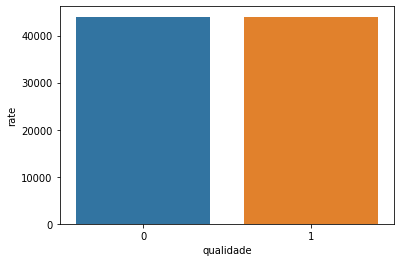

In [ ]:
sns.barplot('qualidade','rate',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


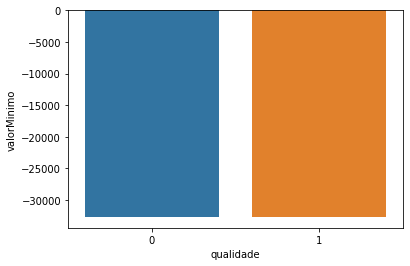

In [ ]:
sns.barplot('qualidade','valorMinimo',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


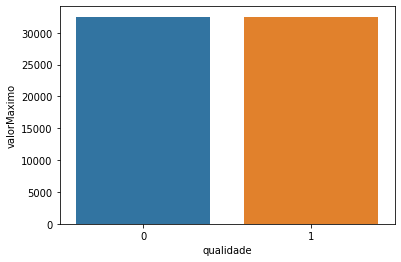

In [ ]:
sns.barplot('qualidade','valorMaximo',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


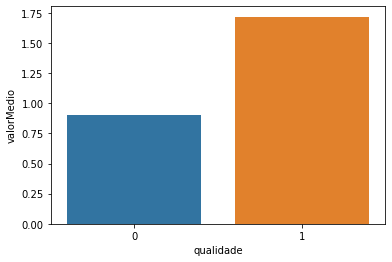

In [ ]:
sns.barplot('qualidade','valorMedio',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


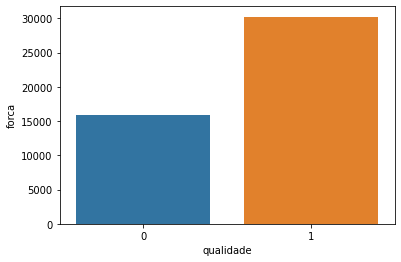

In [ ]:
sns.barplot('qualidade','forca',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


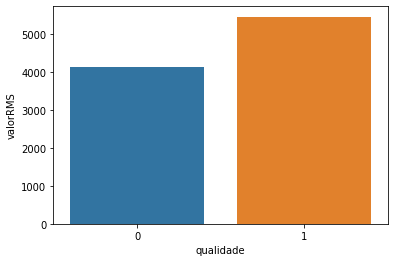

In [ ]:
sns.barplot('qualidade','valorRMS',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


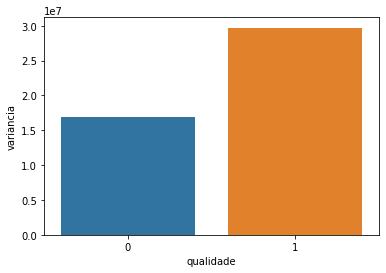

In [ ]:
sns.barplot('qualidade','variancia',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


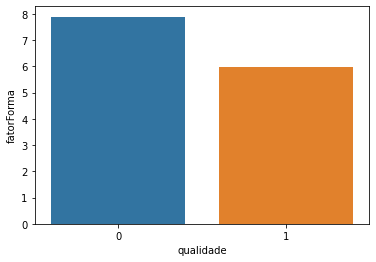

In [ ]:
sns.barplot('qualidade','fatorForma',data=df_filtrado)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


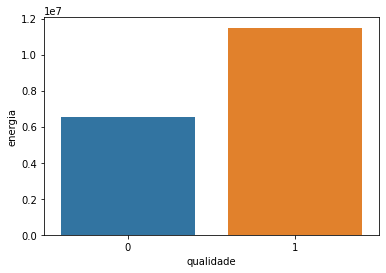

In [ ]:
sns.barplot('qualidade','energia',data=df_filtrado)

COMPARAÇÃO GRAFICA DATASET COMPLETO

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


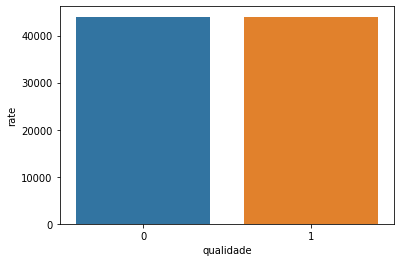

In [ ]:
sns.barplot('qualidade','rate',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


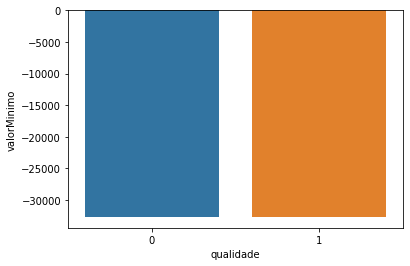

In [ ]:
sns.barplot('qualidade','valorMinimo',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


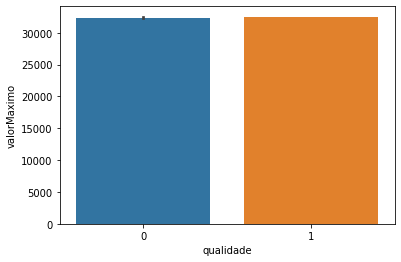

In [ ]:
sns.barplot('qualidade','valorMaximo',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


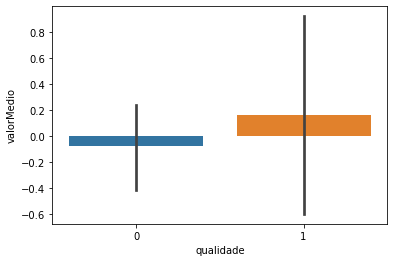

In [ ]:
sns.barplot('qualidade','valorMedio',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


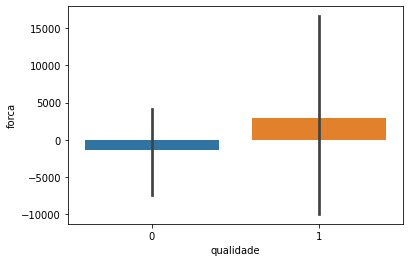

In [ ]:
sns.barplot('qualidade','forca',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


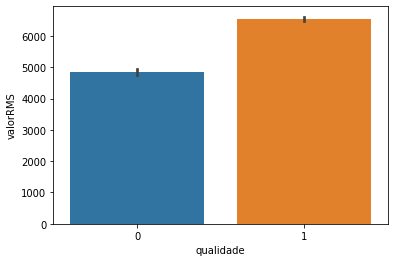

In [ ]:
sns.barplot('qualidade','valorRMS',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


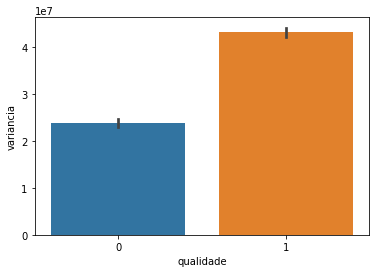

In [ ]:
sns.barplot('qualidade','variancia',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


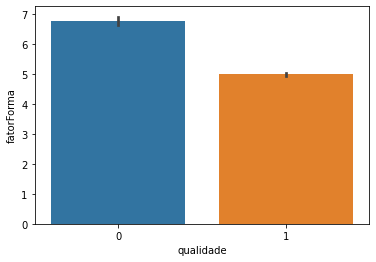

In [ ]:
sns.barplot('qualidade','fatorForma',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


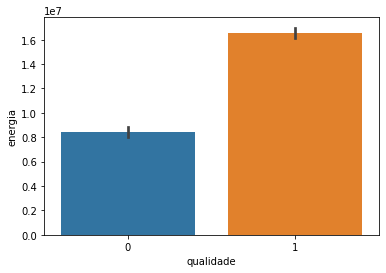

In [ ]:
sns.barplot('qualidade','energia',data=dataframe)

## Seleção das características 

Aplicar alguns dos métodos de seleção de características para selecionar 6 ou menos características para ser input do seu modelo 

obs: Você deverá normalizar os dados para que estejam em 'ranges' iguais 

In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
rms = dataframe['valorRMS'].values
variancia = dataframe['variancia'].values
minimo = dataframe['valorMinimo'].values
forca = dataframe['forca'].values
energia = dataframe['energia'].values

In [ ]:
rms_scaled = scaler.fit_transform(rms.reshape(-1,1))
var_scaled = scaler.fit_transform(variancia.reshape(-1,1))
minimo_scaled = scaler.fit_transform(minimo.reshape(-1,1))
forca_scaled = scaler.fit_transform(forca.reshape(-1,1))
energia_scaled = scaler.fit_transform(energia.reshape(-1,1))

In [ ]:
dataframe['valorRMS'] = rms_scaled
dataframe['variancia'] = var_scaled
dataframe['valorMinimo'] = minimo_scaled
dataframe['forca'] = forca_scaled
dataframe['energia'] = energia_scaled

In [ ]:
dataframe.head()

,qualidade,data,rate,valorMinimo,valorMaximo,valorMedio,forca,valorRMS,variancia,fatorForma,fatorCrista,energia
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,0.0,32511,-1.657955,0.460734,0.112329,0.076251,8.182985,-19609.102125,0.106261
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,0.0,31231,1.311364,0.558511,0.066501,0.044015,8.242544,23815.667244,0.069084
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,0.0,32511,0.523977,0.532583,0.074969,0.049802,8.504054,62046.584255,0.093303
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,0.0,32511,-0.246591,0.507209,0.029390,0.019044,8.931593,-131841.843318,0.037660
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",44000,0.0,27135,-1.147614,0.477539,0.000000,0.000000,7.704429,-23644.717299,0.000000


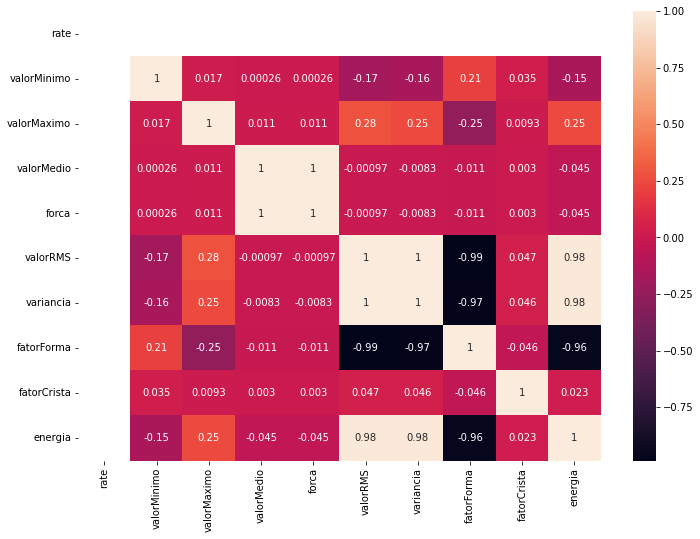

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(dataframe.corr(method='pearson'), annot=True)

In [ ]:
dataframe = dataframe.drop(['data', 'rate', 'forca', 'fatorCrista', 'valorMedio', 'valorMinimo'], axis=1)

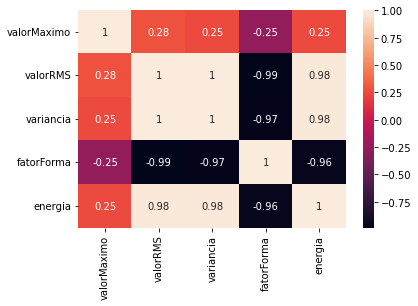

In [ ]:
sns.heatmap(dataframe.corr(method='pearson'), annot=True)

## Definição de X e Y 


In [ ]:
# Armazenando as informações de entrada.
x = dataframe.drop(['qualidade'],axis=1)

In [ ]:
# Armazenando a variavel target.
y = dataframe['qualidade'].astype('int')

In [ ]:
# Criando o modelo.
modelLabelEncoder = LabelEncoder()

In [ ]:
# Realizando a transformação.
yOrdinal = modelLabelEncoder.fit_transform(y)

## Criação do pipeline  (**pipe**)


In [ ]:
# Cria um pipeline.
pipe = Pipeline(steps=[
                    ('classifier', SVC())
                    ]
            )
    

### Definir quais os modelos e hiperparametros serão utilizados para rodar o pipeline.  (**search_space**)

  *  Selecionar 3 modelo de classificação. 
  *  Selecionar pelo menos 2 hiperparâmetro para busca em cada modelo.  


  

In [ ]:
# Criar espaço de algoritmos de aprendizagem candidatos e seus hiperparâmetros.
search_space = [{'classifier': [RandomForestClassifier(n_jobs=-1)],
                'classifier__n_estimators' : [10,100,200]
                },
               
                {'classifier':[SVC(random_state=5,cache_size = 400)],
                  'classifier__kernel' : ['rbf'],
                  'classifier__C' : [0.5,0.75,1,1.25,1.5]
                },
                {'classifier':[KNeighborsClassifier(n_jobs=-1)],
                  'classifier__n_neighbors' : [5,10,15]
                },
             
                ]

### Criar GridSearch e passar como parâmetro:
  *  O pipeline criado anteriormente (**pipe**)
  *  O (**search_space**) contendo os modelos e hiperparâmetros a serem testados  
  *  1 método de validação cruzada (k-fold, leave one out ... etc) 

In [ ]:
 # Cria o gridsearch de busca.
grid_model = GridSearchCV(estimator = pipe,param_grid = search_space, 
                      scoring = 'accuracy' ,
                      cv=5, verbose = 2, n_jobs=-1)

### Treine o GridSearch (.fit(X,Y))

In [ ]:
# Treina todos os modelos.
models = grid_model.fit(x, yOrdinal)    

Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [ ]:
models

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', SVC())]), n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(n_jobs=-1)],
                          'classifier__n_estimators': [10, 100, 200]},
                         {'classifier': [SVC(cache_size=400, random_state=5)],
                          'classifier__C': [0.5, 0.75, 1, 1.25, 1.5],
                          'classifier__kernel': ['rbf']},
                         {'classifier': [KNeighborsClassifier(n_jobs=-1,
                                                              n_neighbors=10)],
                          'classifier__n_neighbors': [5, 10, 15]}],
             scoring='accuracy', verbose=2)

### Print o melhor modelo (.best_estimator_)

In [ ]:
models.best_estimator_

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=10))])

## Treine e Teste o modelo final 

Agora, sabendo qual o melhor modelo para aplicar neste problema você deverá separar seus dados em treino e teste utilizando o método holdout (70 % para treino e 30% para teste)

In [ ]:
# Separando os dados de em treino e teste, de acordo com a % passada.
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)

### Realize  treino (.fit(x_treino,y_treino) com os dados de treino

In [ ]:
modelDecisionTreeCl = DecisionTreeClassifier()

In [ ]:
selector = RFE(modelDecisionTreeCl, n_features_to_select=2)

In [ ]:
featuresSelection = selector.fit(x,y)

In [ ]:
x.columns

Index(['valorMaximo', 'valorRMS', 'variancia', 'fatorForma', 'energia'], dtype='object')

In [ ]:
featuresSelection.support_

array([False, False,  True, False,  True])

### Realize a predição (.predict(x_teste)) com os dados de teste

In [ ]:
y_predict = models.best_estimator_.predict(x_test)

## Avaliação do modelo 

*   Utilizar Acurácia, Precisão, Recall, F1-score para avaliar o modelo
*   Utilizar a matriz de confusão para avaliar o modelo

In [ ]:
# Valores do melhor modelo.
print(classification_report(list(y_test.values),y_predict,target_names=['Ruim','Bom']))

              precision    recall  f1-score   support

        Ruim       0.95      0.97      0.96        40
         Bom       0.98      0.95      0.97        44

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



In [ ]:
cfMatrix = confusion_matrix(list(y_test.values), y_predict)

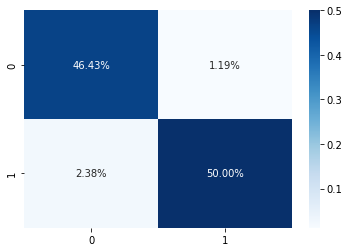

In [ ]:
sns.heatmap(cfMatrix/np.sum(cfMatrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
dataframe

,qualidade,valorMaximo,valorRMS,variancia,fatorForma,energia
0,0,32511,0.112329,0.076251,8.182985,0.106261
1,0,31231,0.066501,0.044015,8.242544,0.069084
2,0,32511,0.074969,0.049802,8.504054,0.093303
3,0,32511,0.029390,0.019044,8.931593,0.037660
4,0,27135,0.000000,0.000000,7.704429,0.000000
...,...,...,...,...,...,...
275,1,32511,0.801743,0.744077,4.822875,0.663695
276,1,32511,0.838854,0.789858,4.718578,0.729284
277,1,32511,0.734994,0.664279,5.022555,0.681191
278,1,32511,0.872229,0.831781,4.628559,0.750602


In [ ]:
exemplo = [30511,0.45,0.05,4.7,0.83]

In [ ]:
resultado = models.predict(np.array(exemplo).reshape(1, -1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Essa telha é ruim" if resultado == 0 else "Essa telha é boa")

Essa telha é ruim
